#### Мажник Павел, 792

### ДЗ 2. Основные методы поиска оценок.
#### Задача 1. 
Сгенерируйте выборки $X_1, \ldots, X_N$ из всех
 распределений из задачи 3.1 $(N = 1000).$ Для всех $n \leq N$ посчитайте
значения полученных оценок (по выборке $X_1, \ldots X_n$) методом
моментов. Оцените дисперсию каждой оценки, сгенерировав для каждой
из них $K = 1000$ бутстрепных выборок а) с помощью параметрического
бутстрепа, б) с помощью непараметрического бутстрепа. Проведите
эксперимент для разных значений параметров распределений
(рассмотрите не менее трех различных значений).

Распределения из задачи 3.1:  
$а) \ N(a, \sigma^2), \ б) \ Г(\alpha, \lambda), \ в) \ R(a, b), \ г) \ Pois(\lambda), \ д) \ Bin(m, p), \ е) \ Geom(p),\ ж) \ Beta(\lambda_1, \lambda_2), \ з) \ Pareto: p(x) = γx^{−γ−1} I(x > 1), \ и) \ Cauchy(\theta).$

##### Необходимые определения.
${\it \bf Параметрический \ бутстреп.}$ 
Пусть $\hat{\theta}$ -- оценка параметра $\theta$ по выборке $X_1,
\ldots, X_n,$ которая получена из распределения $P_\theta.$
Бутстрепная выборка размера $N$ в параметрическом бутстрепе -- это
выборка из распределения $P_{\hat{\theta}}.$  
${\it \bf Непараметрический \ бутстреп.}$ 
Пусть дана выборка $X_1,
\ldots, X_n$ из распределения $P$ и пусть $P^*$ — эмпирическое
распределение, построенное по этой выборке. Бутстрепная выборка
размера $N$ в непараметрическом бутстрепе -- это выборка из
распределения $P^*.$ Легко видеть, что если $i_1, \ldots, i_N \sim
R\{1, \ldots, N\}$ -- независимые случайные величины, то $X_{i_1},
\ldots, X_{i_N}$ -- бутстрепная выборка размера $N$ в
непараметрическом бутстрепе (построенная по выборке $X_1, \ldots,
X_n$ из некоторого распределения $P$).  
${\it \bf Бутстрепная \ оценка \ дисперсии.}$ 
Пусть дана выборка $X_1, \ldots, X_n$ из распределения
$P_\theta,$ a $\hat{\theta} = \hat{\theta}(X_1, \ldots, X_n)$ --
оценка параметра $\theta.$ Сгенерировано $k$ бутстрепных выборок
$X^1 = (X^1_1, \ldots, X^1_N), \ldots, X^k = (X^k_1, \ldots, X_N^k)$
(при этом все эти выборки можно генерировать как на основе
параметрического бутстрепа, так и на основе непараметрического, но
эти серии выборок должны быть сгенерированы одним и тем же
способом) и для каждой из них посчитана оценка параметра
$\hat{\theta}_i = \hat{\theta}(X^i),\ i \in \{1, \ldots, k\}.$ Далее
по выборке $\{\hat{\theta}(X^i)\}_{i\geq 1}$ строится выборочная
дисперсия $s^2(\hat{\theta}) = s^2(\hat{\theta}(X^1), \ldots,
\hat{\theta}(X^k)),$ которая и называется бутстрепной оценкой
дисперсии оценки $\hat{\theta}.$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

N = 10 ** 3
K = 10 ** 3

Напишем необходимые функции для рассчета оценок и построения графиков:

In [41]:
def est(sample, func): # считаем значение оценки для каждого n
    return np.array([func(sample[:i]) for i in range (1, N + 1)])

step = 10

def makePlot(param, nonparam, start, title):
    plt.figure(figsize=(10, 5))
    plt.xlabel(r"$n$")
    plt.ylabel(r"$s^2$")
    plt.plot(range(start, N, step), param, label="Параметрический бутстреп")
    plt.plot(range(start, N, step), nonparam, label="Непараметрический бутстреп")
    plt.title(title)
    plt.legend()
    plt.show()

def GetParamBootstrap(distr, sample, est_func, start):
    param_ests = est(sample, est_func) # считаем значение оценки параметра для каждого n
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        bootstrap_param_samples = distr(param_ests[n]).rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = est_func(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - np.mean(bootstrap_estimators) ** 2
    return s

def GetNonParamBootstrap(sample, est_func, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        bootstrap_param_samples = np.random.choice(sample[:n], size=(K, n))
        for k in range(K):
            bootstrap_estimators[k] = est_func(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - np.mean(bootstrap_estimators) ** 2
    return s

a) $N(a, \sigma^2)$

Посчитаем оценки параметров $a$ и $\sigma : \hat{a} = \overline{X}, \ \hat{\sigma}^2 = \overline{X^2} - \left(\overline{X}\right)^2 .$

In [42]:
def norm_a_est(sample):
    return np.mean(sample)

def norm_sigma_est(sample):
    return np.mean(sample ** 2) - np.mean(sample) ** 2

def norm_bootstrap_est(a, sigma):
    sample = sts.norm.rvs(size=N, loc=a, scale=sigma ** 0.5)
    
    def distr_a(a):
        return sts.norm(loc=a, scale=sigma ** 0.5)
    
    def distr_sigma(sigma):
        return sts.norm(loc=a, scale=sigma ** 0.5)

    a_param_s = GetParamBootstrap(distr_a, sample, norm_a_est, start=10)
    a_nonparam_s = GetNonParamBootstrap(sample, norm_a_est, start=10)    
    makePlot(a_param_s, a_nonparam_s, 10, f"sigma={sigma}")
    
    sigma_param_s = GetParamBootstrap(distr_sigma, sample, norm_sigma_est, start=10)
    sigma_nonparam_s = GetNonParamBootstrap(sample, norm_sigma_est, start=10)
    makePlot(sigma_param_s, sigma_nonparam_s, 10, f"a={a}")

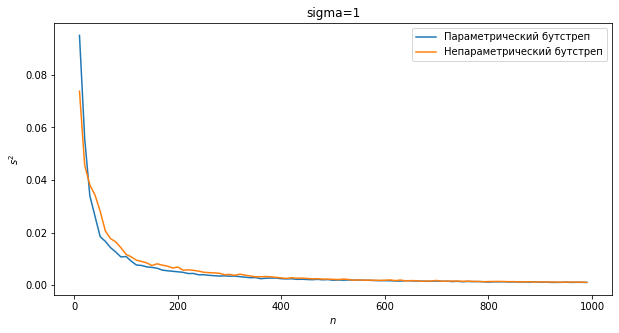

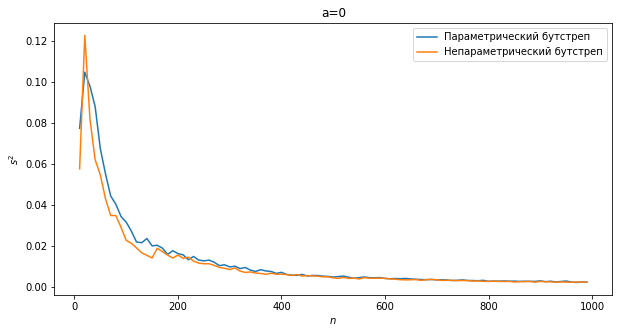

In [44]:
norm_bootstrap_est(0, 1)

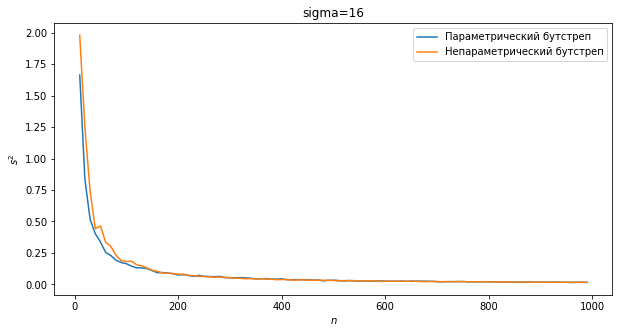

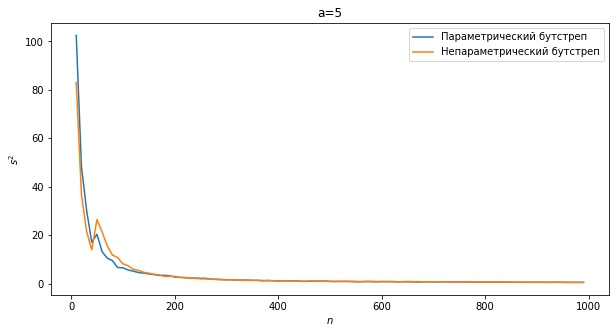

In [45]:
norm_bootstrap_est(5, 16)

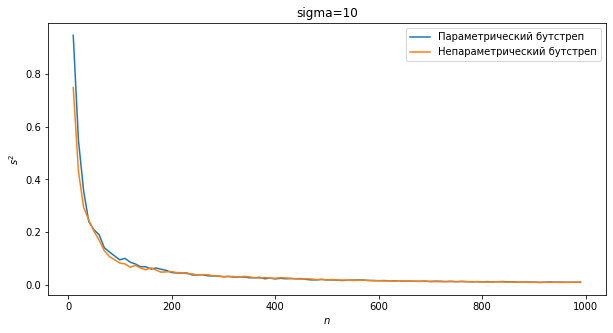

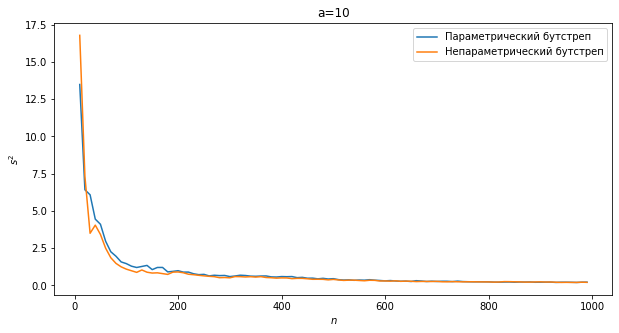

In [46]:
norm_bootstrap_est(10, 10)

$б) \ Г(\alpha, \lambda)$

$\hat{\alpha} = \frac{\left(\overline{X}\right)^2}{\overline{X^2} - \left(\overline{X}\right)^2}, \ \hat{\lambda} = \frac{\overline{X}}{\overline{X^2} - \left(\overline{X}\right)^2}$

In [58]:
np.seterr(divide='ignore')

def theta1_est(sample):
    return np.mean(sample) ** 2 / (np.mean(sample ** 2) - np.mean(sample) ** 2)

def theta2_est(sample):
    return np.mean(sample) / (np.mean(sample ** 2) - np.mean(sample) ** 2)

def gamma_bootstrap_est(alpha, lambd):
    sample = sts.gamma.rvs(size=N, a=alpha, scale=1/lambd)
    
    def distr_1(alpha):
        return sts.gamma(a=alpha, scale=1/lambd)
    
    def distr_2(lambd):
        return sts.gamma(a=alpha, scale=1/lambd)
    
    start = 100

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est, start)
    theta1_nonparam_s = GetNonParamBootstrap(sample, theta1_est, start)    
    makePlot(theta1_param_s, theta1_nonparam_s, start, f"alpha={alpha}")
    
    theta2_param_s = GetParamBootstrap(distr_2, sample, theta2_est, start)
    theta2_nonparam_s = GetNonParamBootstrap(sample, theta2_est, start)
    makePlot(theta2_param_s, theta2_nonparam_s, start, f"lambda={lambd}")

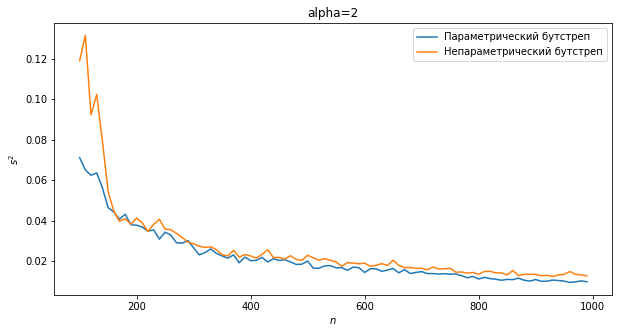

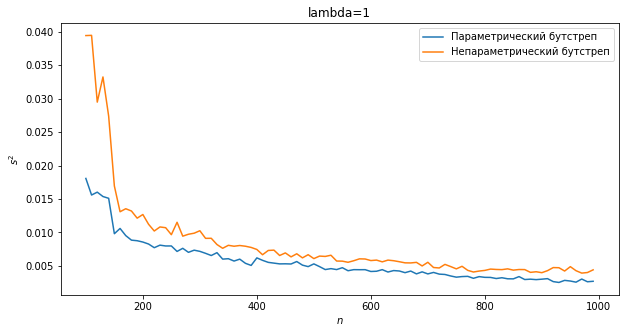

In [59]:
gamma_bootstrap_est(2, 1)

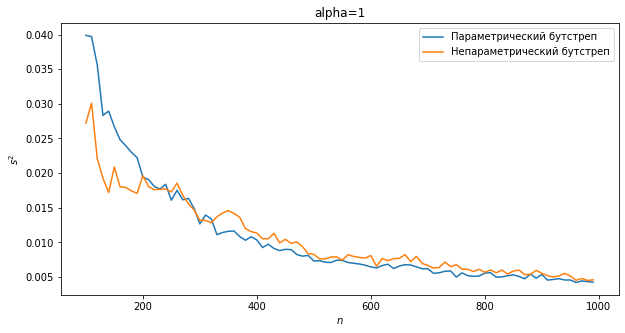

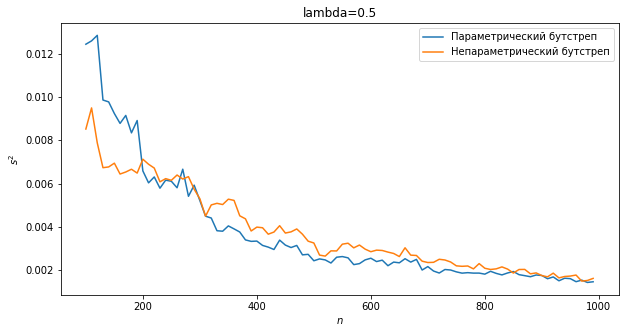

In [60]:
gamma_bootstrap_est(1, 0.5)

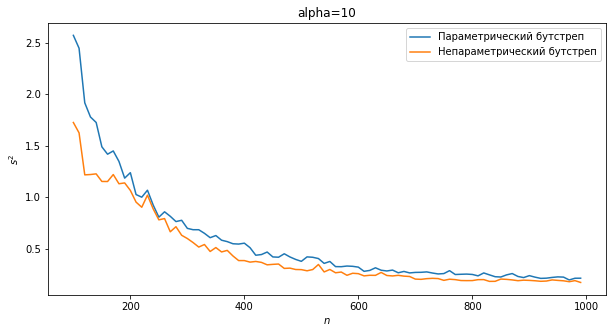

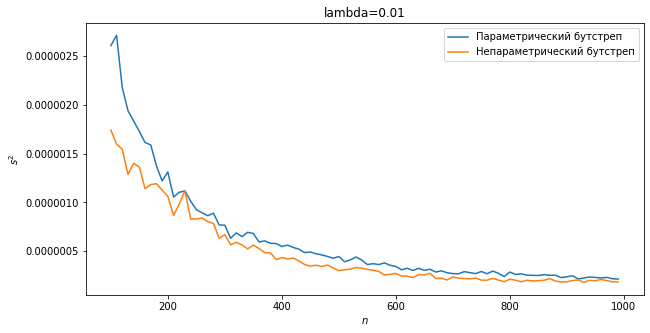

In [61]:
gamma_bootstrap_est(10, 0.01)

$в) \ R(a, b)$

$\hat{a} = \overline{X} - \sqrt{3 \left(\overline{X^2} - \left(\overline{X}\right)^2\right)}$, $\hat{b} = \overline{X} + \sqrt{3 \left(\overline{X^2} - \left(\overline{X}\right)^2\right)}$

In [69]:
def theta1_est(sample):
    return np.mean(sample) - (3 * (np.mean(sample ** 2) - np.mean(sample) ** 2)) ** 0.5

def theta2_est(sample):
    return np.mean(sample) + (3 * (np.mean(sample ** 2) - np.mean(sample) ** 2)) ** 0.5

def uniform_bootstrap_est(a, b):
    sample = sts.uniform.rvs(size=N, loc=a, scale=b-a)
    
    def distr_1(a):
        return sts.uniform(loc=a, scale=b-a)
    
    def distr_2(b):
        return sts.uniform(loc=a, scale=b-a)
    
    start = 10

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est, start)
    theta1_nonparam_s = GetNonParamBootstrap(sample, theta1_est, start)    
    makePlot(theta1_param_s, theta1_nonparam_s, start, r"Оценка $\hat{a}$")
    
    theta2_param_s = GetParamBootstrap(distr_2, sample, theta2_est, start)
    theta2_nonparam_s = GetNonParamBootstrap(sample, theta2_est, start)
    makePlot(theta2_param_s, theta2_nonparam_s, start, r"Оценка $\hat{b}$")

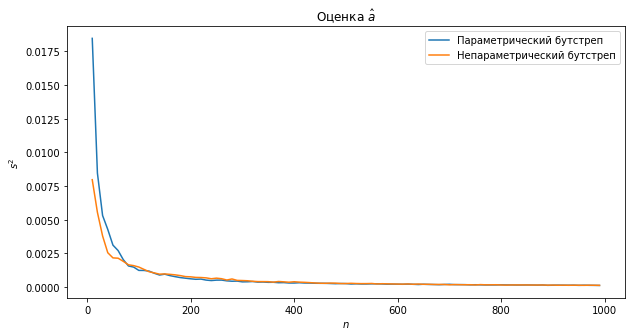

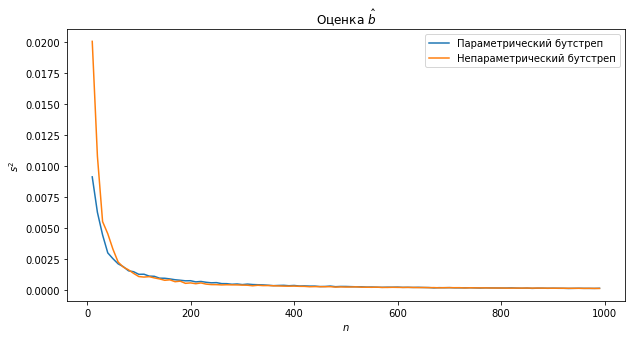

In [70]:
uniform_bootstrap_est(0, 1)

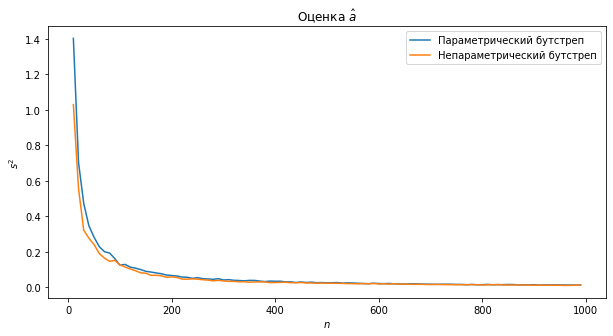

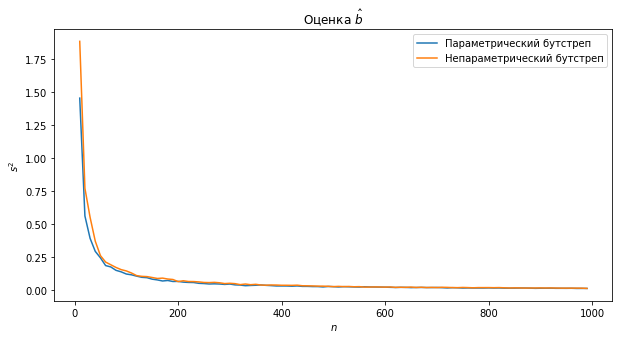

In [71]:
uniform_bootstrap_est(10, 20)

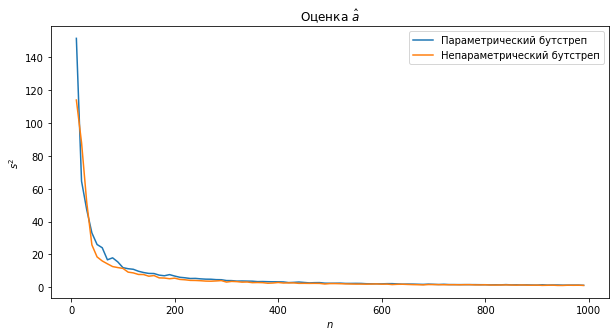

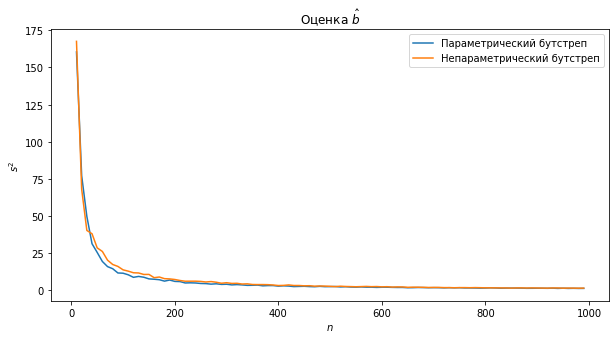

In [72]:
uniform_bootstrap_est(5, 100)

$г) \ Pois(\lambda)$

$\hat{\lambda} = \overline{X}$

In [99]:
def theta1_est(sample):
    return np.mean(sample)

def poisson_bootstrap_est(lambd):
    sample = sts.poisson.rvs(size=N, mu=lambd)
    
    def distr_1(lambd):
        return sts.poisson(mu=lambd)
    
    start = 10

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est, start)
    theta1_nonparam_s = GetNonParamBootstrap(sample, theta1_est, start)    
    makePlot(theta1_param_s, theta1_nonparam_s, start, r"Оценка $\hat{\lambda}$")

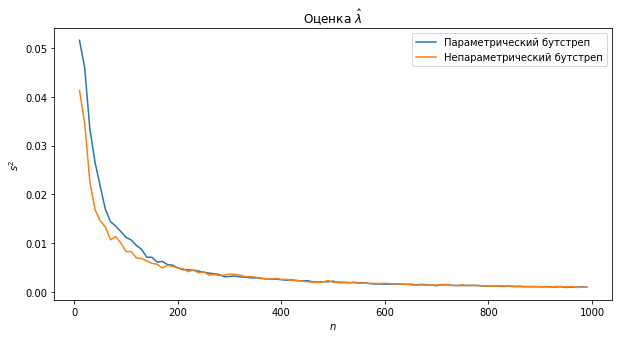

In [100]:
poisson_bootstrap_est(1)

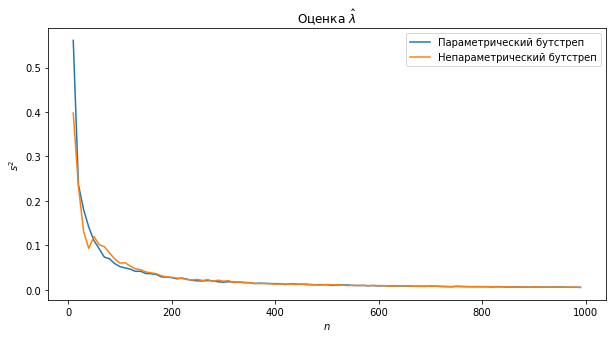

In [101]:
poisson_bootstrap_est(5)

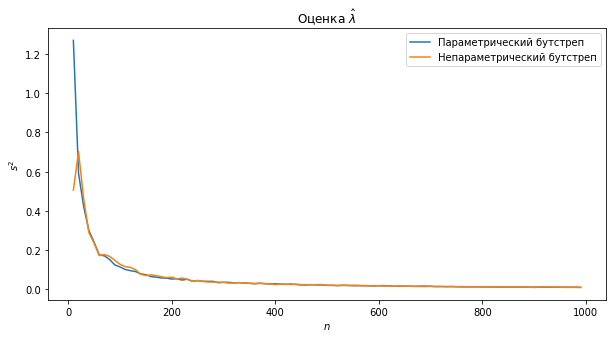

In [102]:
poisson_bootstrap_est(11)

$д) \ Bin(m, p)$

$\hat{m} = \frac{\left(\overline X\right)^2}{\overline X + \left(\overline X\right)^2 - \overline{X^2}}$, $\hat{p} = \frac{\overline X + \left(\overline X\right)^2 - \overline{X^2}}{\overline X}$

In [106]:
def theta1_est(sample):
    return np.mean(sample) ** 2 / (np.mean(sample) ** 2 - np.mean(sample ** 2) + np.mean(sample))

def theta2_est(sample):
    return (np.mean(sample) ** 2 -  np.mean(sample ** 2) + np.mean(sample)) / np.mean(sample)

def binom_bootstrap_est(m, p):
    sample = sts.binom.rvs(m, p, size=N)
    
    def distr_1(m):
        return sts.binom(int(round(m)), p)
    
    def distr_2(p):
        return sts.binom(m, p)
    
    start = 200

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est, start)
    theta1_nonparam_s = GetNonParamBootstrap(sample, theta1_est, start)    
    makePlot(theta1_param_s, theta1_nonparam_s, start, r"Оценка $\hat{m}$")
    
    theta2_param_s = GetParamBootstrap(distr_2, sample, theta2_est, start)
    theta2_nonparam_s = GetNonParamBootstrap(sample, theta2_est, start)
    makePlot(theta2_param_s, theta2_nonparam_s, start, r"Оценка $\hat{p}$")

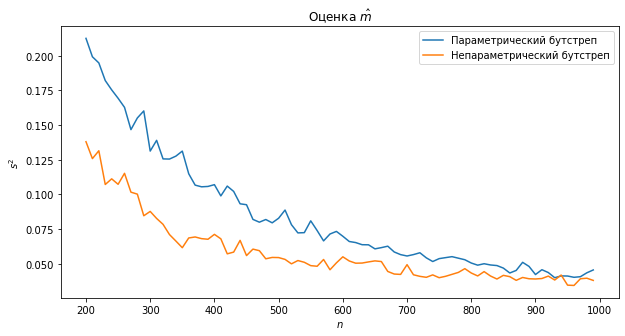

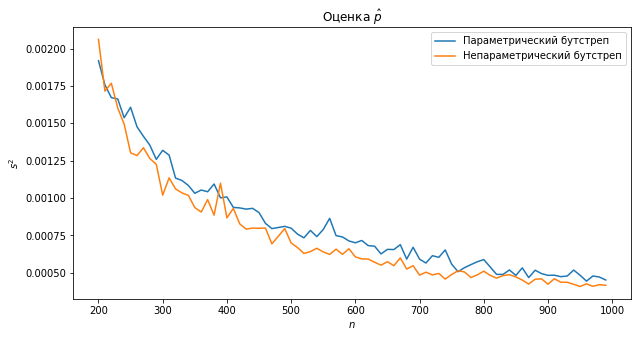

In [107]:
binom_bootstrap_est(5, 0.5)

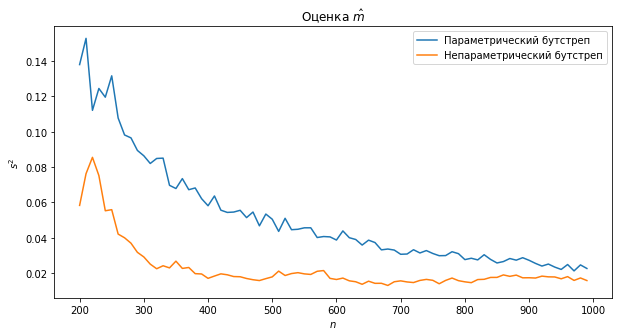

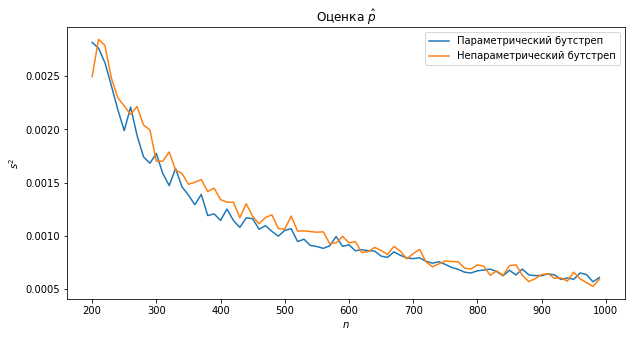

In [109]:
binom_bootstrap_est(2, 0.3)

$е) \ Geom(p)$

$\hat{p} = \frac{1}{\overline{X}}$

In [110]:
def theta1_est(sample):
    return 1 / np.mean(sample)

def geom_bootstrap_est(p):
    sample = sts.geom.rvs(p, size=N)
    
    def distr_1(p):
        return sts.geom(p)
    
    start = 10

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est, start)
    theta1_nonparam_s = GetNonParamBootstrap(sample, theta1_est, start)    
    makePlot(theta1_param_s, theta1_nonparam_s, start, r"Оценка $\hat{p}$")

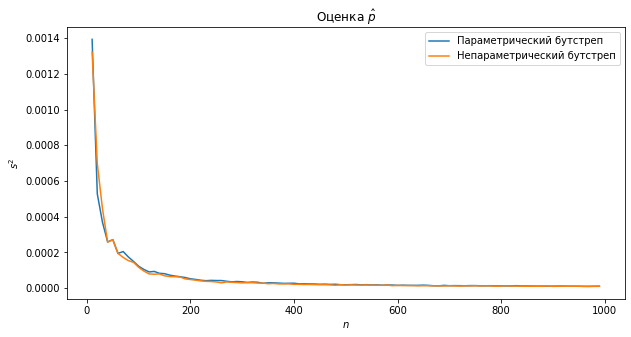

In [111]:
geom_bootstrap_est(0.1)

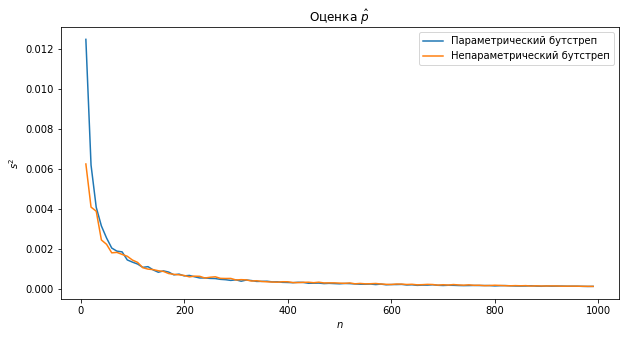

In [112]:
geom_bootstrap_est(0.5)

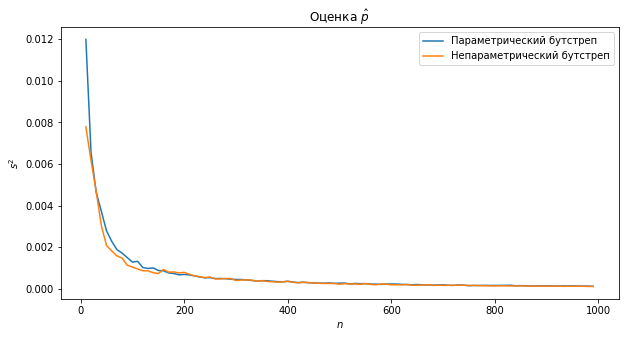

In [113]:
geom_bootstrap_est(0.8)

$ж) \ Beta(\lambda_1, \lambda_2)$

$\hat{\lambda_1} = \frac{\left(\overline X\right)^2 - \overline{X^2}\overline X}{\overline{X^2} - \left(\overline X\right)^2}$, $\hat{\lambda_2} = \frac{\left(\overline{X^2} - \overline{X}\right)\left(1 - \overline{X}\right)}{\left(\overline{X}\right)^2 - \overline{X^2}}$

In [114]:
def theta1_est(sample):
    return (np.mean(sample ** 2) * np.mean(sample) - np.mean(sample) ** 2) / (np.mean(sample) ** 2 - np.mean(sample ** 2))

def theta2_est(sample):
    return (np.mean(sample ** 2) - np.mean(sample)) * (1 - np.mean(sample)) / (np.mean(sample) ** 2 - np.mean(sample ** 2))

def beta_bootstrap_est(lambd1, lambd2):
    sample = sts.beta.rvs(lambd1, lambd2, size=N)
    
    def distr_1(lambd1):
        return sts.beta(lambd1, lambd2)
    
    def distr_2(lambd2):
        return sts.beta(lambd1, lambd2)
    
    start = 200

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est, start)
    theta1_nonparam_s = GetNonParamBootstrap(sample, theta1_est, start)    
    makePlot(theta1_param_s, theta1_nonparam_s, start, r"Оценка $\hat{\lambda_1}$")
    
    theta2_param_s = GetParamBootstrap(distr_2, sample, theta2_est, start)
    theta2_nonparam_s = GetNonParamBootstrap(sample, theta2_est, start)
    makePlot(theta2_param_s, theta2_nonparam_s, start, r"Оценка $\hat{\lambda_2}$")

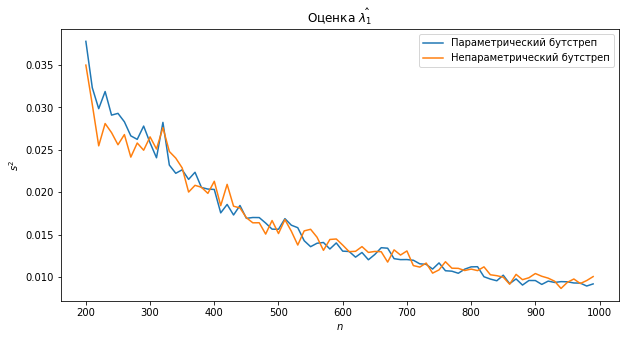

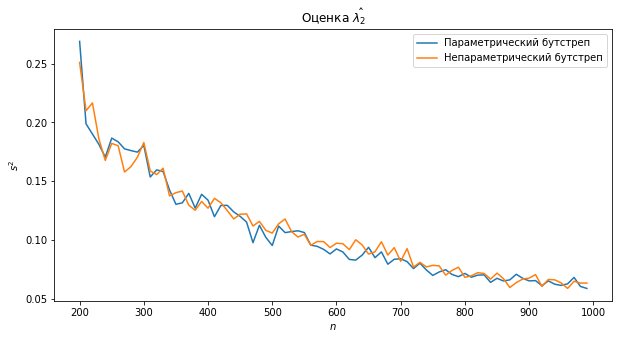

In [115]:
beta_bootstrap_est(2, 5)

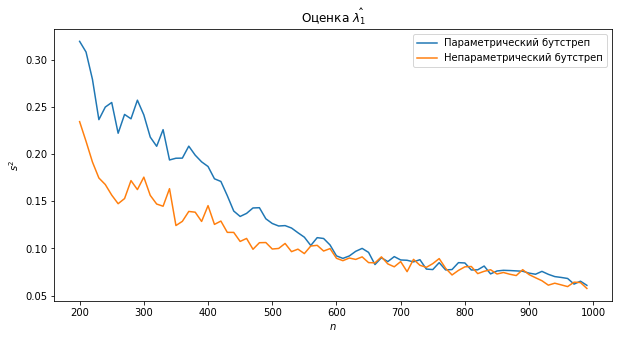

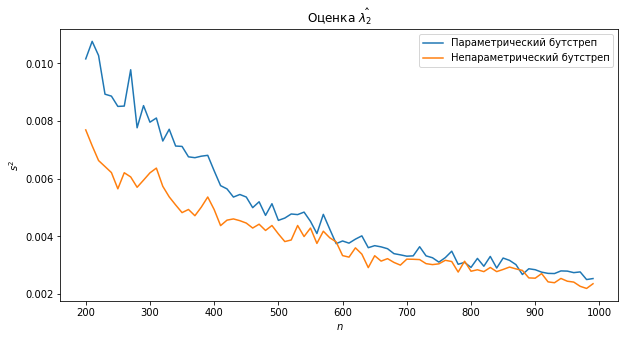

In [116]:
beta_bootstrap_est(5, 1)

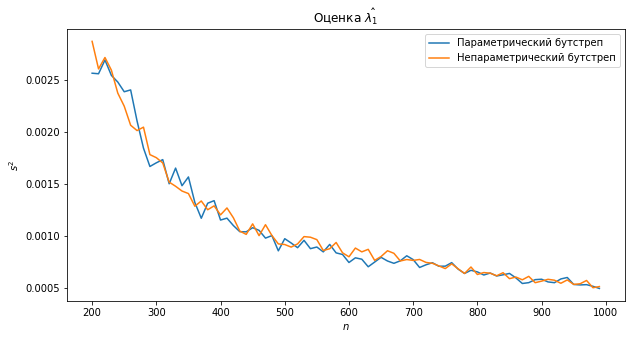

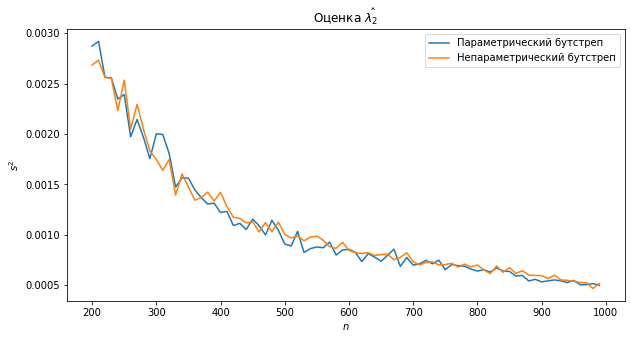

In [117]:
beta_bootstrap_est(0.5, 0.5)

$з) \ Pareto: p(x) = γx^{−γ−1} I(x > 1)$

$\hat{\gamma} = \frac{1}{\overline{\ln{X}}}$

In [118]:
def theta1_est(sample):
    return 1 / np.mean(np.log(sample))

def pareto_bootstrap_est(gamma):
    sample = sts.pareto.rvs(gamma, size=N)
    
    def distr_1(gamma):
        return sts.pareto(gamma)
    
    start = 10

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est, start)
    theta1_nonparam_s = GetNonParamBootstrap(sample, theta1_est, start)    
    makePlot(theta1_param_s, theta1_nonparam_s, start, r"Оценка $\hat{\gamma}$")

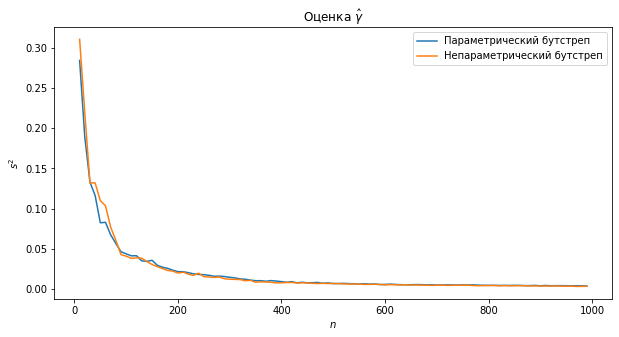

In [119]:
pareto_bootstrap_est(2)

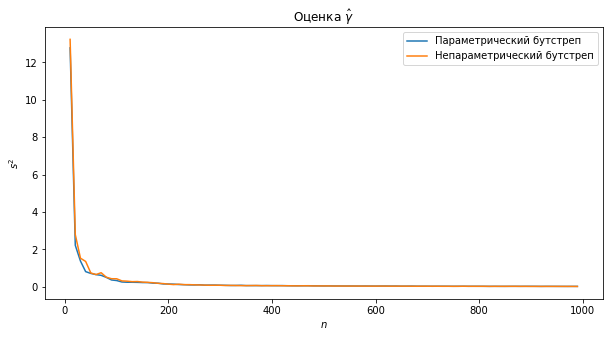

In [120]:
pareto_bootstrap_est(5)

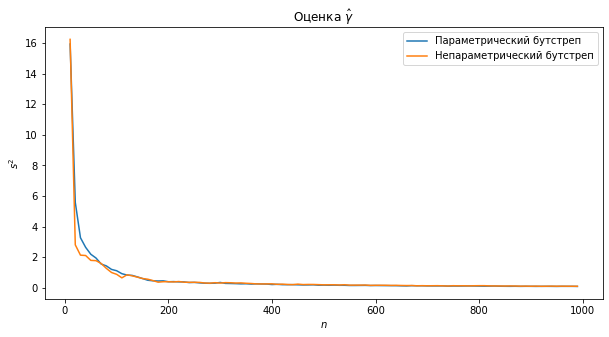

In [121]:
pareto_bootstrap_est(9)

$и) \ Cauchy(\theta)$

$\hat{\theta} = \frac1{\mathrm{tg}\left(\pi \overline{I(x \in [0, 1])}\right)}$

In [122]:
def theta1_est(sample):
    return 1 / np.tan(np.pi * np.mean([1 if x >= 0 and x <= 1 else 0 for x in sample]))

def cauchy_bootstrap_est(theta):
    sample = sts.cauchy.rvs(scale=theta, size=N)
    
    def distr_1(theta):
        return sts.cauchy(scale=theta)
    
    start = 100

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est, start)
    theta1_nonparam_s = GetNonParamBootstrap(sample, theta1_est, start)    
    makePlot(theta1_param_s, theta1_nonparam_s, start, r"Оценка $\hat{\theta}$")

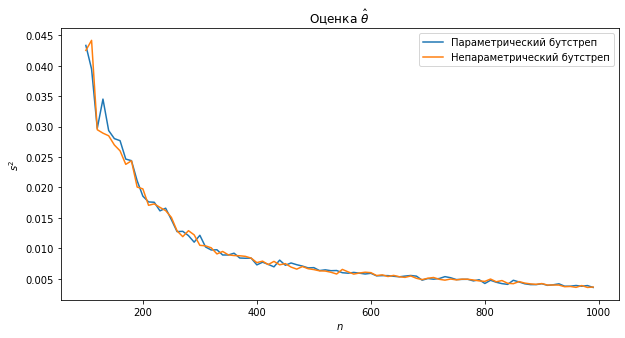

In [123]:
cauchy_bootstrap_est(0.5)

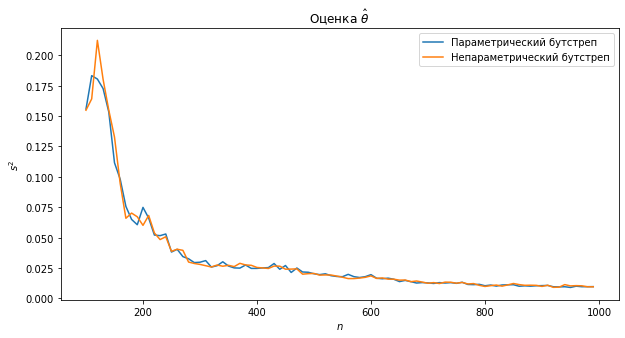

In [124]:
cauchy_bootstrap_est(1)

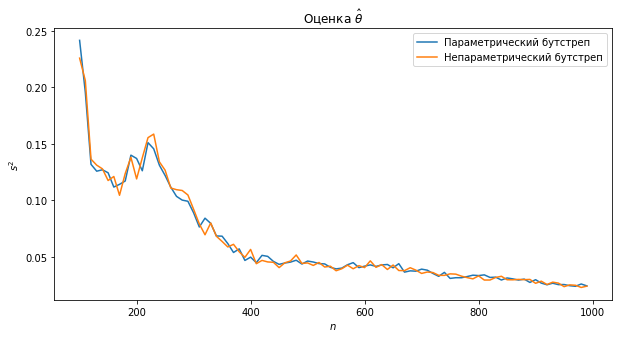

In [125]:
cauchy_bootstrap_est(2)

Для всех распределений, которые мы рассмотрели, бутстрепная оценка дисперсии оценки уменьшается с ростом $n$, как для параметрического, так и для непараметрического бутстрепа. Результаты для параметрического и непараметрического метода совпадают.